<h1><center>cs1001.py , Tel Aviv University, Spring 2020</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

###### Recitation 7

We continued discussing recursion.
We also discussed memoization and demonstrated it.


#### Takeaways:
- Memoization is mainly technical. Remember the main steps of defining an envelope function, deciding what keys you use to describe the input, 
and finally changing your recursive implementation so that it will search for the key in the dictionary (or any other data structure) before making the recursive calls, and save the key:value pair after obtaining the value for a certain input. 
- The keys of the dictionary  should be chosen to represent the current input to the function in a one-to-one fashion.
- When analyzing the time complexity of a recursive function with memoization, consider the recursion tree and remember that a node that has already been computed will not have a subtree.

#### Code for printing several outputs in one cell (not part of the recitation):

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Counting paths

Question 2(a) from the 2015 fall semester exam (Moed B).

Given a list $L$ of non-negative integers with $len(L) = d$ we consider $L$ as a point in a $d$-dimensional space.

For example: $L = [0, 0, 0]$ represents the origin in a $3$-dimensional space.

Our goal is to find how many ways we have of getting from $[0, \ldots, 0]$ to $L$ by advancing **only forward** (that is, going only down towardz zero in each coordinate).

For example, if $L=[1, 2]$ then we have three such paths:
* $[0,0] \to [1, 0] \to [1, 1] \to [1,2]$
* $[0,0] \to [0, 1] \to [1, 1] \to [1,2]$
* $[0,0] \to [0, 1] \to [0, 2] \to [1,2]$

Again, we first think of the base case, and then reduce big problems to smaller ones.

* If $L$ has only zeros then there is a single possible path - not taking any steps.
* Otherwise, we have the following relation, let $L = [a_1, \ldots, a_n]$, then: $$paths([a_1, \ldots, a_n]) = \sum_{i : a_i > 0}paths([a_1,\ldots, a_i - 1, \ldots, a_n])$$

This gives rise to a simple recursive algorithm:

In [3]:
def cnt_paths(L):
    if all_zeros(L):
        return 1
    
    result = 0
    for i in range(len(L)):
        if L[i] != 0:
            L[i] -= 1
            result += cnt_paths(L)
            L[i] += 1 ## WHY???
    return result

def all_zeros(L):
    for i in L:
        if i != 0:
            return False
    return True


print(cnt_paths([3,4,5]))

27720


## Analysis

We will show that this solution is intractable. That is, the time complexity is **at least** exponential in the input size.

Let's look at a simple case where $d = |L|= 2$ and $L = [n, n]$.
Consider the recursion tree for this input. In the first $n-1$ levels of the tree each node has exactly 2 children (why?).
The overall number of nodes in the first $n$ levels of the tree is $\Sigma_{i=0}^{n-1}{2^i} = 2^n - 1$.
Note that there are many more nodes in the tree that we did not count.

Recall, our goal is to give a **lower bound** on the running time. We do this using two key observations:

* First, that the size of the recursion tree is a lower bound on the running time - this is because each recursive call needs to perform at least one operation.
* Second, that the size of the first $n$ levels of the tree is a lower bound on the tree size - this is obvious.

Together, we get that the running time is at least the size of the first $n$ levels of the trees which is exponential: $2^n - 1$.

Now, let's look at a slight generalization, where $L = [n, n, \ldots, n]$ and $|L| = d$. I.e. - we are in a $d$-dimensional space and we want to get from $[n, \ldots, n]$ to $[0,\ldots,0]$. As before, the number of nodes in the first $n$ levels of the tree is $\Sigma_{i=0}^{n-1}{d^i} \approx d^n = 2^{\log{d^n}} = 2^{n\log{d}}$.
Therefore, the time complexity is at least exponential in both $n,  \log{d}$. 


Another way to bound (from below) the number of nodes in the tree is to count the number of leaves in the tree.  Since at each leaf we return 1, the number of leaves is actually the number $cnt$ of "legal paths" that we count.

It can be shown (combinatorically) that $cnt$ is at least exponential in $d,n$. That is, while our lower bound was exponential in $n, \log d$, the actual running time is not far off.

Can we do better?

## Combinatorial solution (for reference only)

Can you think of a combinatorial solution for cnt_paths? Let's take the case above where $L = [n, n, \ldots, n]$ and $|L| = d$. 

In each step we subtract $1$ from one of the $d$ coordinates (which is currently positive) and in exactly $nd$ steps we need to get to the all-zero vector.

Think about the first coordinate - there are precisely $n$ steps along our path where we change this coordinate, thus we have $\binom{nd}{n}$ options to choose where the moves for the first coordinate are located.

What about the second coordainte? Well now we are left with $nd - n = n(d-1)$ places out of which we again pick $n$ places to advance the second coordinate. By indcution, we get: $$cnt = \prod_{i=1}^d \tbinom{n(d-i+1)}{n} = \prod_{i=1}^d \tbinom{ni}{n} $$

How long does it take to compute this number? We need to multiply $d$ elements, and for each of those we need to compute factorials and divide numbers in the range of $1,\ldots,n$. This is clearly done in time polynomial in $d,n$.

And how big is $cnt$ exactly? Recall that $cnt$ is a bound on the running time of cnt_paths. 

We now claim that $cnt = exp(n,d)$. To see this, we write it explicitly:

$$cnt = \tbinom{n}{n}\cdot \tbinom{2n}{n} \cdots \tbinom{dn}{n} = \frac{n!}{(n-n)! n!} \cdot \frac{(2n)!}{(2n-n)! n!} \cdot \frac{(3n)!}{(3n-n)! n!}\cdots \frac{(nd)!}{(nd-n)! n!} $$

This product has a telescopic property - thus we can cancel out elements and get: 

$$cnt =  \frac{(nd)!}{(n!)^d} = \frac{1\cdot 2 \cdot 3 \cdots \cdot nd}{(1 \cdot 2 \cdots n) \cdots(1 \cdot 2 \cdots n)} $$

Break this product into two terms:

$$cnt = \frac{1 \cdots 2n}{n! \cdot n!} \cdot \frac{(2n + 1) \cdots nd }{(n!)^{d - 2}}$$

The first multiplicand is clearly larger than $1$, as for the second, each term in the numerator is **at least** $2n$ and each term in the denominator is **at most** $n$ thus clearly: $$cnt  \gg \frac{2n \cdot 2n \cdots 2n}{n \cdot n \cdot n} = 2^{dn - 2n} = exp(n,d)$$

Conclusion? Using the combinatorial computation we reduce a running time which is exponential in $n,d$ into a running time polynomial in $n,d$.

## Memoization

### Binom 
The number of sets of size $k$ selected from a set of $n$ elements (with no repetitions)
Recursive formula (Pascal):
$\binom{n}{k} = \binom{n-1}{k} + \binom{n-1}{k-1}$
where the base cases are $\binom{n}{0} = \binom{n}{n} = 1$

The time complexity of binom is exponential in $n$ (worst case behaviour is when $k=\frac{n}{2}$)

In [4]:
def binom(n,k):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    return binom(n-1,k-1) + binom(n-1,k)

binom(4,2)

6

Now with memoization. We will use a matrix (list of lists) as our additional memory.

In [13]:
def binom_fast(n,k):
    mat = [[-1 for i in range(k+1) ] for j in range(n+1) ]
    return binom_mem(n,k,mat)

def binom_mem(n,k,mem):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    if mem[n][k] == -1:
        mem[n][k] = binom_mem(n-1,k, mem) + \
                    binom_mem(n-1,k-1, mem)
    return mem[n][k]

binom_fast(4,2)
binom_fast(50,25)

6

126410606437752

We could also use a dictionary as our additional memory.

In [10]:
def binom_fast(n,k):
    d = {}
    return binom_mem(n,k,d)

def binom_mem(n,k,mem):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    if (n,k) not in mem:
        mem[(n,k)] = binom_mem(n-1,k, mem) + \
                    binom_mem(n-1,k-1, mem)
    return mem[(n,k)]

binom_fast(4,2)
binom_fast(50,25)

6

126410606437752

#### Analysis of binom_fast(n,k):

To analyze the time complexity of the function, we will construct an $ (n+1) \times (k+1)$ table, where the cell in position $(i,j)$ will denote a call to compute $\binom{i}{j}$.

In this method, the running time can be computed by $$\text{number of visited cells} \times \text{number of visits per cell} \times \text{time per cell (without recursive calls)}$$

Consider a cell in position $(i,j)$. By our recursive formula, this cell will be called exactly in the cases where we need to compute either $(i + 1, j)$ or $(i + 1, j + 1)$.

Now, assume $(i+1, j)$ was the first cell to call $(i,j)$, then:
* No call to $(i+1, j+1)$ will be initiated before the call to $(i +1,j)$ is completed (this is obvious by the structure of the formula)
* Once the call to $(i +1,j)$ is completed, $(i, j)$ will be in the dictionary
* At this point, the call to $(i + 1, j +1 )$ will not need to compute $(i,j)$ from scratch as it is already in the dictionary
* Once $(i +1, j)$ and $(i+1,j+1)$ are both computed, the code will never call $(i,j)$ again, since they are both in the dictionary

It follows that each cell will be accessed at most twice, and thus the running time is clearly $O(nk)$. In the diagram below we see that we can even give a more precise running time based on the fact that many cells in the table are base cases.Time complexity = number of different visited cells \* number of visits per cell \* time per visit (not including recursive calls)



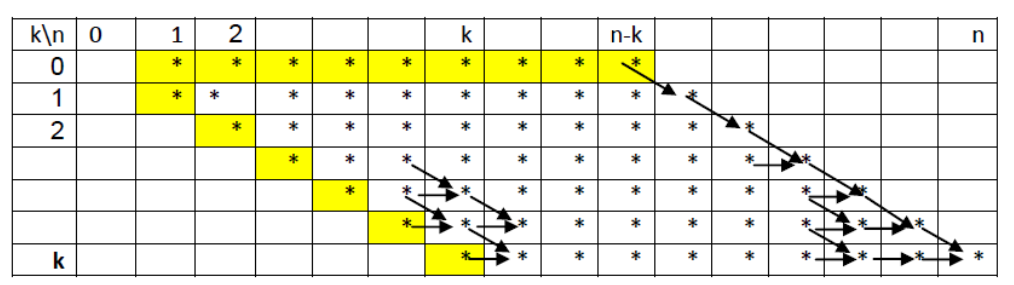

## Change problem (from last week)

A bus driver needs to give an exact change and she has coins of limited types. She has infinite coins of each type.
Given the amount of change ($amount$) and the coin types (the list $coins$), how many ways are there? 


In [2]:
def change(amount, coins):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    return change(amount, coins[:-1]) +\
        change(amount - coins[-1], coins)
    
change(5, [1,2,3])

5

Now with memoization.

Option #1:

In [11]:
def change_fast(amount, coins):
    d = {}
    return change_mem(amount, coins, d)

def change_mem(amount, coins, d):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    if (amount, tuple(coins)) not in d:
        d[(amount, tuple(coins))] = \
            change_mem(amount, coins[:-1], d) +\
            change_mem(amount - coins[-1], coins, d)
    return d[(amount, tuple(coins))]
    
change_fast(500, [1,3,2])

21084

Memoization - Option #2:

In [12]:
def change_fast(amount, coins):
    d = {}
    return change_mem(amount, coins, d)

def change_mem(amount, coins, d):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    if (amount, len(coins)) not in d:
        d[(amount, len(coins))] = \
            change_mem(amount, coins[:-1], d) +\
            change_mem(amount - coins[-1], coins, d)
    return d[(amount, len(coins))]

change_fast(500, [1,3,2])

21084

## Choose sets

Question from a past exam.

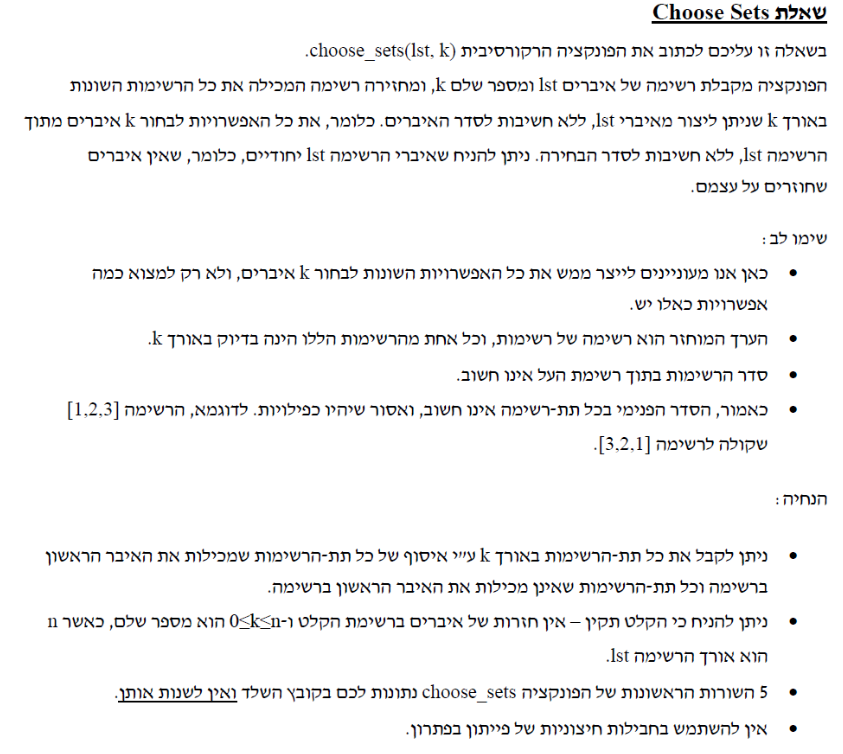

Some examples:

choose_sets([1,2,3,4], 0) ---> [[]]

choose_sets([1,2,3,4], 4) ---> [[]]

choose_sets([1,2,3], 1) ---> [[2, 1], [3, 1], [4, 1], [3, 2], [4, 2], [4, 3]]   #This is one possible output, as the order of the list items and of the items in the internal lists may vary
 





In [1]:
def choose_sets(lst,k):
    if k==0:
        return [[]]
    elif len(lst)<k:
        return []
    tmp = choose_sets(lst[1:],k-1)
    for e in tmp:
        e.append(lst[0])
                
    tmp.extend(choose_sets(lst[1:],k))
    return tmp
    
choose_sets([1,2,3,4], 0)


[[]]

In [2]:
choose_sets([1,2,3], 2)


[[2, 1], [3, 1], [3, 2]]

In [3]:
choose_sets([1,2,3,4], 4)

[[4, 3, 2, 1]]